Copyright 2020 DeepMind Technologies Limited

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

     https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Clone repo and import dependencies

In [1]:
import objaverse
import multiprocessing
import random
import trimesh

processes = multiprocessing.cpu_count()
random.seed(42)
uids = objaverse.load_uids()
random_object_uids = random.sample(uids, 4)
steak_uids = ['b47dc21973344b779445f4e1511a8042', 'a6fa0df7d7ce4022b7202a9334a59763', '622fc5f8e60442439ebb0d8338108385', '3fe13164a6074993a8670a22d8feec41', '44c81c84860844fbbebbdcc558548420']
plate_uids = ['ff6c2a731571458f883ae44d33522bb8', '7c265f6c42ef40b8b3e9c42560c28a97', 'd908887c14a54382a2384db2d50ab9d2', 'e91f046f7d5c4dbda1571259b0460782', 'e447aa2a406e4f738fc381972665e19c']
fork_uids = ['f77e41ee56b04bfd960b161131837bac', 'd9f56c6b4938496e94ca04ed61743c64', 'b40f7ac290d241aba9027c6cabe222c1', '7ade6b2a36174ce3a03308ba8531f33e', '34c052f5182d40d9b204c0dc83d1f44b']
knife_uids = ['f44ca5eb44fe444d8ad1890cd5cfccf0', 'b71cea598155484cbca74c09cd4d55bb', 'aa5b9a4041d245e894473ce681a94d6f', '484ffa5d2513452791e5c7dcffeba9c0', 'fead1ba410e94c65be571220e8f4bdc6']
random_object_uids = [*random.sample(steak_uids, 1), *random.sample(plate_uids, 1), *random.sample(fork_uids, 1), *random.sample(knife_uids, 1)]
print(random_object_uids)
objects = objaverse.load_objects(
    uids=random_object_uids,
    download_processes=processes
)


['622fc5f8e60442439ebb0d8338108385', '7c265f6c42ef40b8b3e9c42560c28a97', 'd9f56c6b4938496e94ca04ed61743c64', 'b71cea598155484cbca74c09cd4d55bb']


In [2]:
meshes = []
for uid, path in objects.items():
    scene = trimesh.load(path)
    geometries = list(scene.geometry.values())
    geometry = geometries[0]
    meshes.append(geometry)

In [3]:


import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # Hide TF deprecation messages
import matplotlib.pyplot as plt

import modules
import data_utils

/home/deria/anaconda3/envs/AnkurTF/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/deria/anaconda3/envs/AnkurTF/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/deria/anaconda3/envs/AnkurTF/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/deria/anaconda3/envs/AnkurTF/lib/python3

## Prepare a synthetic dataset
We prepare a dataset of meshes using four simple geometric primitives.

The important function here is `data_utils.load_process_mesh`, which loads the raw `.obj` file, normalizes and centers the meshes, and applies quantization to the vertex positions. The mesh faces are flattened and treated as a long sequence, with a new-face token (`=1`) separating the faces. For each of the four synthetic meshes, we associate a unique class label, so we can train class-conditional models.

After processing the raw mesh data into numpy arrays, we create a `tf.data.Dataset` that we can use to feed data to our models. 

current object =  0
current object =  1
current object =  2
current object =  3
{'vertices': array([[115, 148,  54],
       [139, 148,  54],
       [113, 149,  56],
       [141, 149,  56],
       [115, 181,  56],
       [139, 181,  56],
       [113, 180,  58],
       [141, 180,  58],
       [115,  48,  65],
       [139,  48,  65],
       [114, 150,  65],
       [141, 150,  65],
       [115,  67,  66],
       [139,  67,  66],
       [113,  49,  67],
       [141,  49,  67],
       [114, 178,  67],
       [141, 178,  67],
       [113,  66,  68],
       [141,  66,  68],
       [115, 206,  68],
       [139, 206,  68],
       [115, 103,  70],
       [139, 103,  70],
       [113, 151,  70],
       [114, 151,  70],
       [141, 151,  70],
       [113, 204,  70],
       [141, 204,  70],
       [113, 177,  71],
       [114, 177,  71],
       [141, 177,  71],
       [115,  86,  72],
       [139,  86,  72],
       [113, 104,  72],
       [141, 104,  72],
       [113,  85,  74],
       [141,  85,  

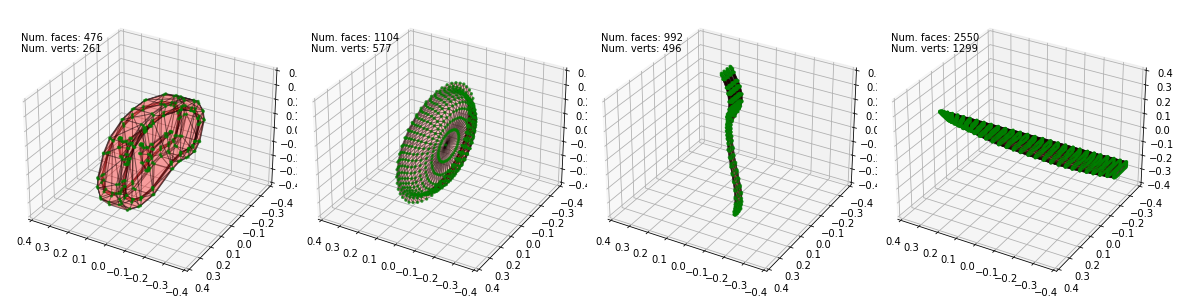

In [4]:
ex_list = []
max_verts  = 0
max_faces = 0
for k, (uid,path) in enumerate(objects.items()):
  print("current object = ", k)
  mesh_dict = data_utils.process_mesh_trimesh(list(trimesh.load(path).geometry.values())[0])
  if(mesh_dict['vertices'].shape[0] > max_verts):
    max_verts = mesh_dict['vertices'].shape[0]
  if(mesh_dict['faces'].shape[0] > max_faces):
    max_faces = mesh_dict['faces'].shape[0]
  mesh_dict['class_label'] = k
  ex_list.append(mesh_dict)
synthetic_dataset = tf.data.Dataset.from_generator(
    lambda: ex_list, 
    output_types={
        'vertices': tf.int32, 'faces': tf.int32, 'class_label': tf.int32},
    output_shapes={
        'vertices': tf.TensorShape([None, 3]), 'faces': tf.TensorShape([None]), 
        'class_label': tf.TensorShape(())}
    )
ex = synthetic_dataset.make_one_shot_iterator().get_next()

# Inspect the first mesh
with tf.Session() as sess:
  ex_np = sess.run(ex)
print(ex_np)

# Plot the meshes
mesh_list = []
with tf.Session() as sess:
  for i in range(4):
    ex_np = sess.run(ex)
    mesh_list.append(
        {'vertices': data_utils.dequantize_verts(ex_np['vertices']), 
         'faces': data_utils.unflatten_faces(ex_np['faces'])})
data_utils.plot_meshes(mesh_list, ax_lims=0.4)

## Vertex model

#### Prepare the dataset for vertex model training
We need to perform some additional processing to make the dataset ready for vertex model training. In particular, `data_utils.make_vertex_model_dataset` flattens the `[V, 3]` vertex arrays, ordering by `Z->Y->X` coordinates. It also creates masks, which are used to mask padded elements in data batches. We also add random shifts to make the modelling task more challenging.

#### Create a vertex model
`modules.VertexModel` is a Sonnet module that. Calling the module on a batch of data will produce outputs which are the sequential predictions for each vertex coordinate. The basis of the vertex model is a Transformer decoder, and we specify it's parameters in `decoder_config`. 



In [40]:
print("max_verts = ", max_verts)
print("max_faces = ", max_faces)

max_verts =  1299
max_faces =  10200


In [6]:
# Prepare the dataset for vertex model training
vertex_model_dataset = data_utils.make_vertex_model_dataset(
    synthetic_dataset, apply_random_shift=False)
vertex_model_dataset = vertex_model_dataset.repeat()
vertex_model_dataset = vertex_model_dataset.padded_batch(
    4, padded_shapes=vertex_model_dataset.output_shapes)
vertex_model_dataset = vertex_model_dataset.prefetch(1)
vertex_model_batch = vertex_model_dataset.make_one_shot_iterator().get_next()

# Create vertex model
vertex_model = modules.VertexModel(
    decoder_config={
        'hidden_size': 128,
        'fc_size': 512, 
        'num_layers': 3,
        'dropout_rate': 0.
    },
    class_conditional=True,
    num_classes=4,
    max_num_input_verts=2000 ,  # number of vertices in the input mesh, if this is lower than the number of vertices in the mesh, there will be errors during training
    quantization_bits=8,
)
vertex_model_pred_dist = vertex_model(vertex_model_batch)
vertex_model_loss = -tf.reduce_sum(
    vertex_model_pred_dist.log_prob(vertex_model_batch['vertices_flat']) * 
    vertex_model_batch['vertices_flat_mask'])
vertex_samples = vertex_model.sample(
    4, context=vertex_model_batch, max_sample_length=2000, top_p=0.95,
    recenter_verts=False, only_return_complete=False)

print(vertex_model_batch)
print(vertex_model_pred_dist)
print(vertex_samples)

{'vertices': <tf.Tensor 'IteratorGetNext_2:2' shape=(?, ?, 3) dtype=int32>, 'faces': <tf.Tensor 'IteratorGetNext_2:1' shape=(?, ?) dtype=int32>, 'class_label': <tf.Tensor 'IteratorGetNext_2:0' shape=(?,) dtype=int32>, 'vertices_flat': <tf.Tensor 'IteratorGetNext_2:3' shape=(?, ?) dtype=int32>, 'vertices_flat_mask': <tf.Tensor 'IteratorGetNext_2:4' shape=(?, ?) dtype=float32>}
tfp.distributions.Categorical("vertex_model_1_2/vertex_model_1/create_dist/Categorical/", batch_shape=[?, ?], event_shape=[], dtype=int32)
{'completed': <tf.Tensor 'Any_1:0' shape=(?,) dtype=bool>, 'vertices': <tf.Tensor 'mul_9:0' shape=(?, 2000, 3) dtype=float32>, 'num_vertices': <tf.Tensor 'floordiv_1:0' shape=(?,) dtype=int32>, 'vertices_mask': <tf.Tensor 'Cast_5:0' shape=(?, 2000) dtype=float32>}


## Face model

#### Prepare the dataset for face model training
We need to perform some additional processing to make the dataset ready for vertex model training. In particular, `data_utils.make_vertex_model_dataset` flattens the `[V, 3]` vertex arrays, ordering by `Z->Y->X` coordinates. It also creates masks, which are used to mask padded elements in data batches. We also add random shifts to make the modelling task more challenging.

#### Create a face model
`modules.VertexModel` is a Sonnet module that. Calling the module on a batch of data will produce outputs which are the sequential predictions for each vertex coordinate. The basis of the vertex model is a Transformer decoder, and we specify it's parameters in `decoder_config`. 

In [7]:
face_model_dataset = data_utils.make_face_model_dataset(
    synthetic_dataset, apply_random_shift=False)
face_model_dataset = face_model_dataset.repeat()
face_model_dataset = face_model_dataset.padded_batch(
    4, padded_shapes=face_model_dataset.output_shapes)
face_model_dataset = face_model_dataset.prefetch(1)
face_model_batch = face_model_dataset.make_one_shot_iterator().get_next()

# Create face model
face_model = modules.FaceModel(
    encoder_config={
        'hidden_size': 128,
        'fc_size': 512, 
        'num_layers': 3,
        'dropout_rate': 0.
    },
    decoder_config={
        'hidden_size': 128,
        'fc_size': 512, 
        'num_layers': 3,
        'dropout_rate': 0.
    },
    class_conditional=False,
    max_seq_length=11000, # number of faces in the input mesh, if this is lower than the number of vertices in the mesh, there will be errors during training
    quantization_bits=8,
    decoder_cross_attention=True,
    use_discrete_vertex_embeddings=True,
)
face_model_pred_dist = face_model(face_model_batch)
face_model_loss = -tf.reduce_sum(
    face_model_pred_dist.log_prob(face_model_batch['faces']) * 
    face_model_batch['faces_mask'])
face_samples = face_model.sample(
    context=vertex_samples, max_sample_length=11000, top_p=0.95,
    only_return_complete=False)
print(face_model_batch)
print(face_model_pred_dist)
print(face_samples)

{'vertices': <tf.Tensor 'IteratorGetNext_3:4' shape=(?, ?, 3) dtype=float32>, 'faces': <tf.Tensor 'IteratorGetNext_3:1' shape=(?, ?) dtype=int64>, 'class_label': <tf.Tensor 'IteratorGetNext_3:0' shape=(?,) dtype=int32>, 'num_vertices': <tf.Tensor 'IteratorGetNext_3:3' shape=(?,) dtype=int32>, 'vertices_mask': <tf.Tensor 'IteratorGetNext_3:5' shape=(?, ?) dtype=float32>, 'faces_mask': <tf.Tensor 'IteratorGetNext_3:2' shape=(?, ?) dtype=float32>}
tfp.distributions.Categorical("face_model_1/face_model/create_dist/Categorical/", batch_shape=[?, ?], event_shape=[], dtype=int32)
{'context': {'completed': <tf.Tensor 'Any_1:0' shape=(?,) dtype=bool>, 'vertices': <tf.Tensor 'mul_9:0' shape=(?, 2000, 3) dtype=float32>, 'num_vertices': <tf.Tensor 'floordiv_1:0' shape=(?,) dtype=int32>, 'vertices_mask': <tf.Tensor 'Cast_5:0' shape=(?, 2000) dtype=float32>}, 'completed': <tf.Tensor 'Any_2:0' shape=(?,) dtype=bool>, 'faces': <tf.Tensor 'Pad_2:0' shape=(?, ?) dtype=int32>, 'num_face_indices': <tf.Ten

## Train on the synthetic data

Now that we've created vertex and face models and their respective data loaders, we can train them and look at some outputs. While we train the models together here, they can be trained seperately and recombined later if required. 

Step 0
Loss (vertices) 43854.55078125
Loss (faces) 136487.90625


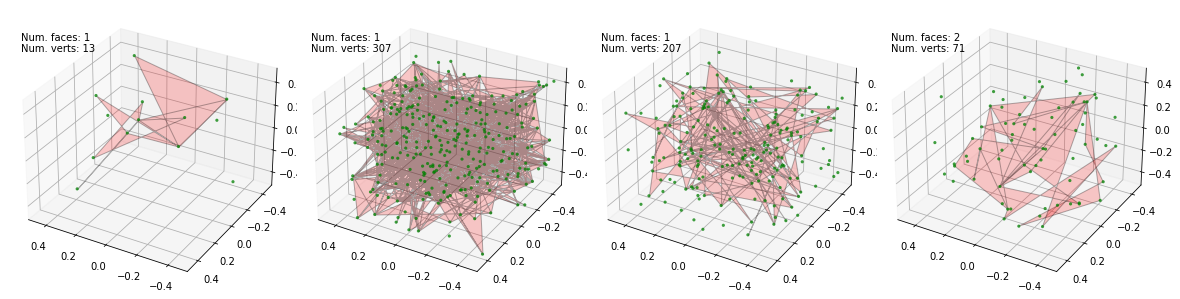

Step 5
Loss (vertices) 42527.9375
Loss (faces) 133832.203125


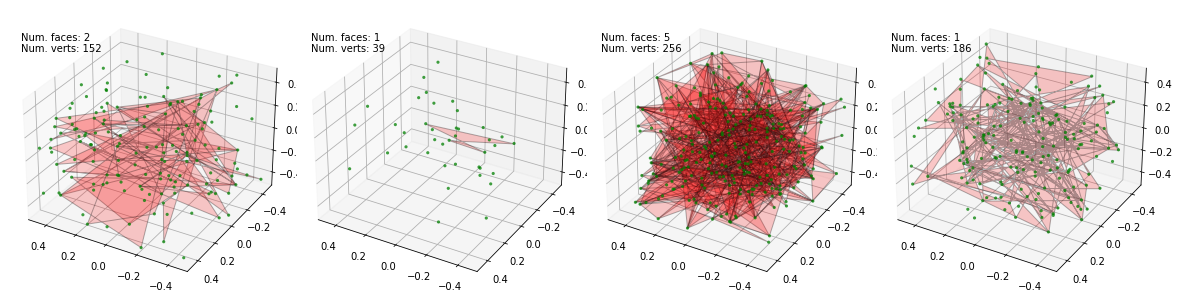

Step 10
Loss (vertices) 40976.90234375
Loss (faces) 128445.296875


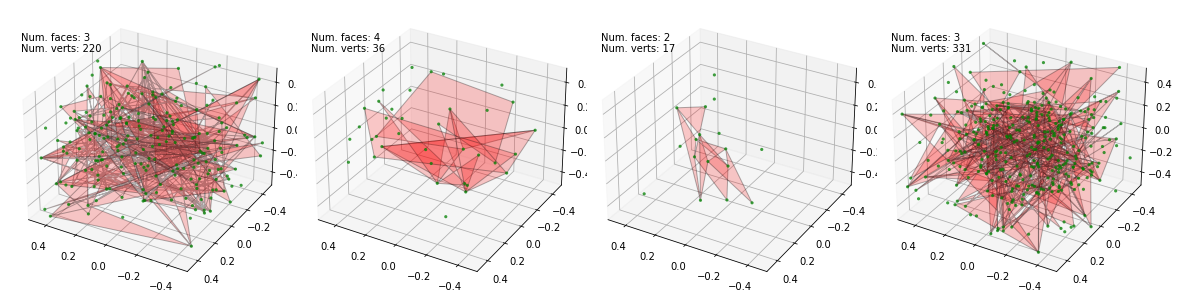

Step 15
Loss (vertices) 39046.15625
Loss (faces) 115684.34375


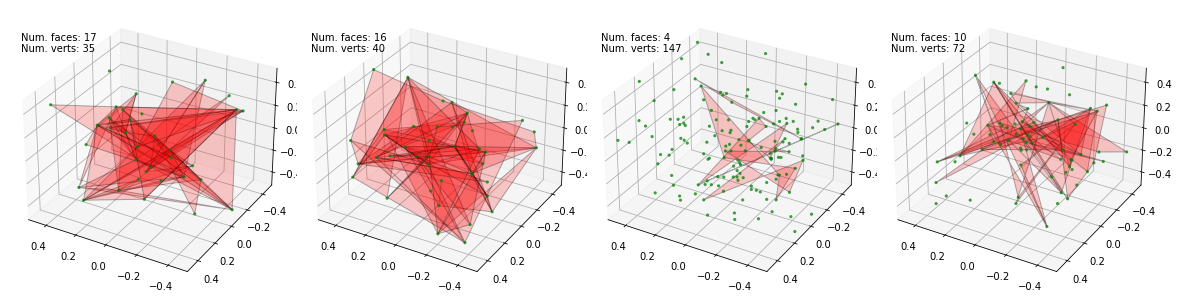

Step 20
Loss (vertices) 37296.41015625
Loss (faces) 114017.1953125


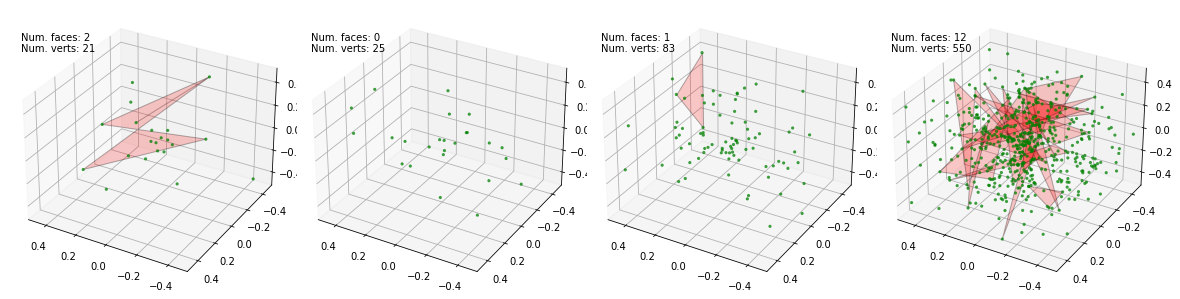

Step 25
Loss (vertices) 36288.578125
Loss (faces) 109676.8515625


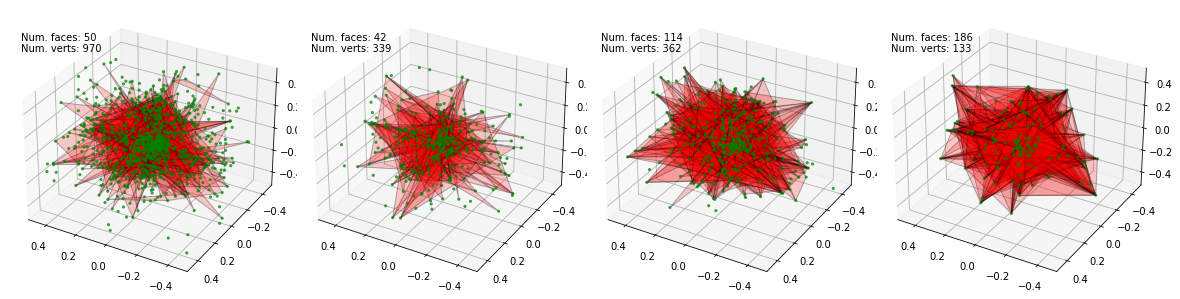

Step 30
Loss (vertices) 35396.7578125
Loss (faces) 108323.75


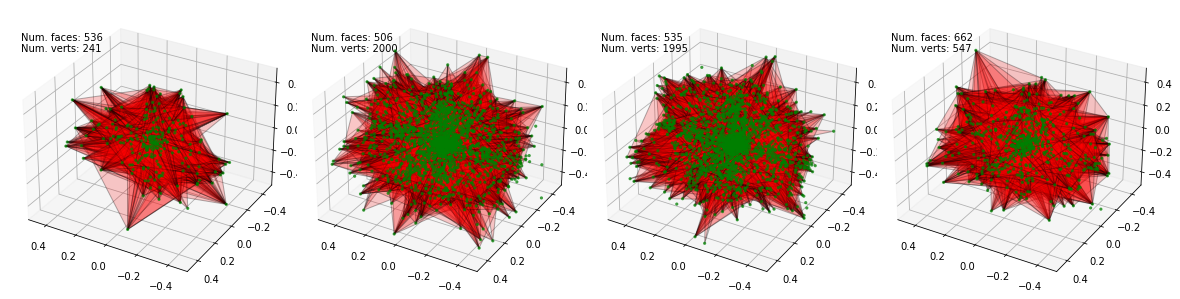

Step 35
Loss (vertices) 34562.125
Loss (faces) 105703.296875


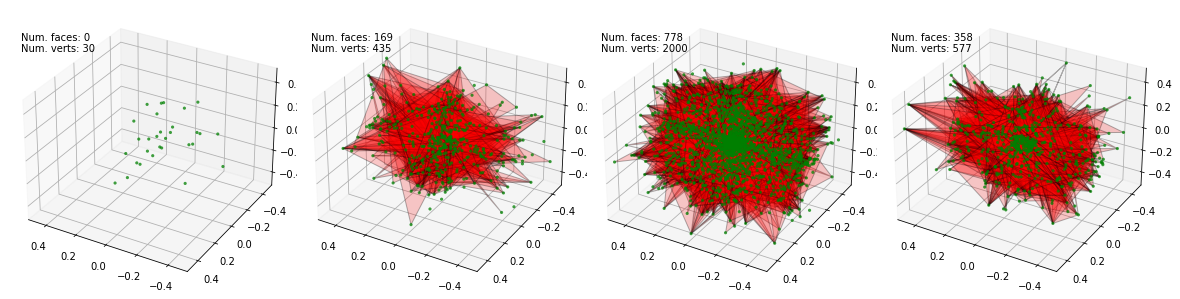

Step 40
Loss (vertices) 33915.7890625
Loss (faces) 103513.59375


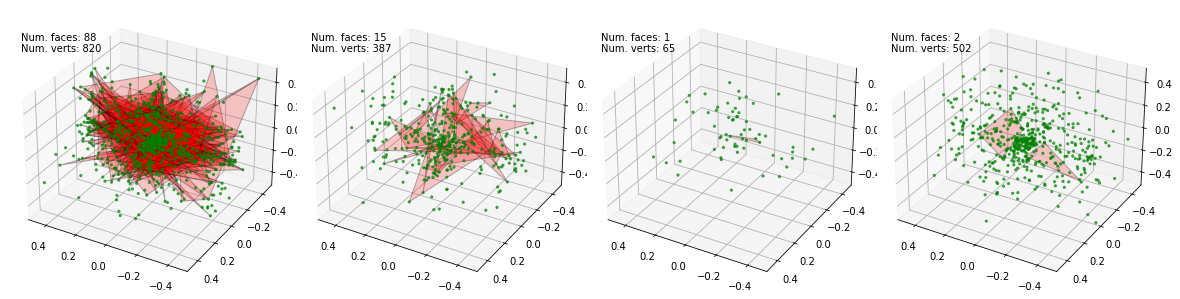

Step 45
Loss (vertices) 33107.4453125
Loss (faces) 101832.140625


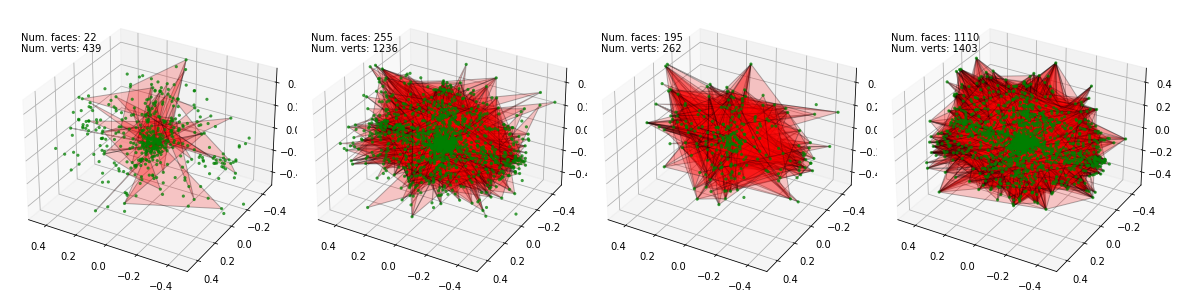

Step 50
Loss (vertices) 32062.40234375
Loss (faces) 99512.4765625


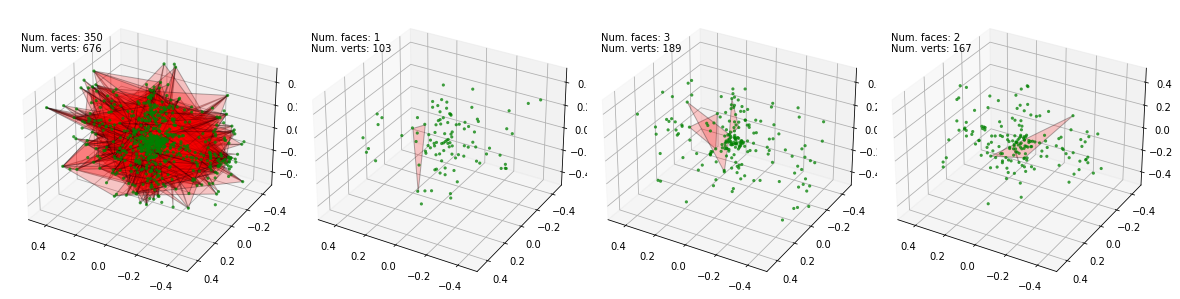

Step 55
Loss (vertices) 30846.537109375
Loss (faces) 97244.6875


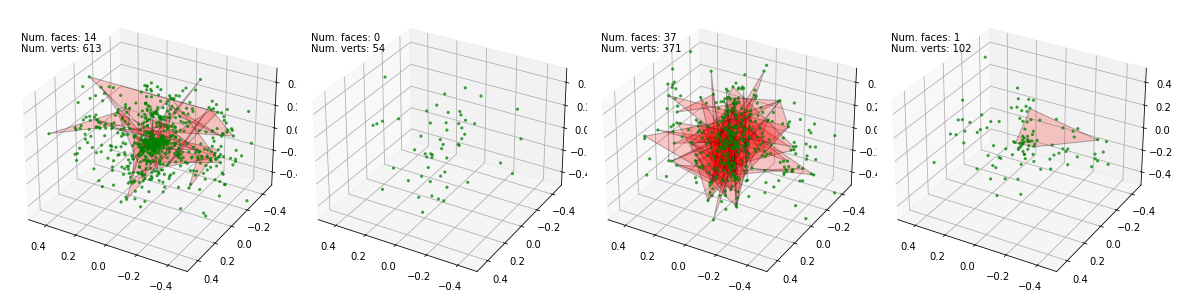

Step 60
Loss (vertices) 29637.52734375
Loss (faces) 95010.078125


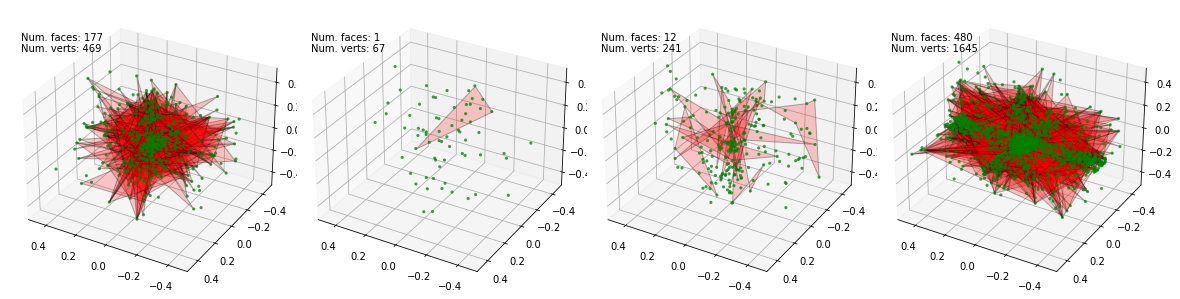

Step 65
Loss (vertices) 28413.521484375
Loss (faces) 92586.765625


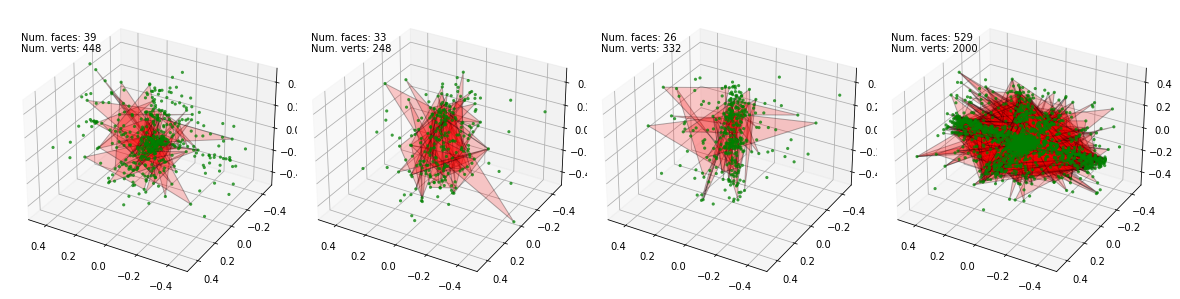

Step 70
Loss (vertices) 27126.25390625
Loss (faces) 89993.84375


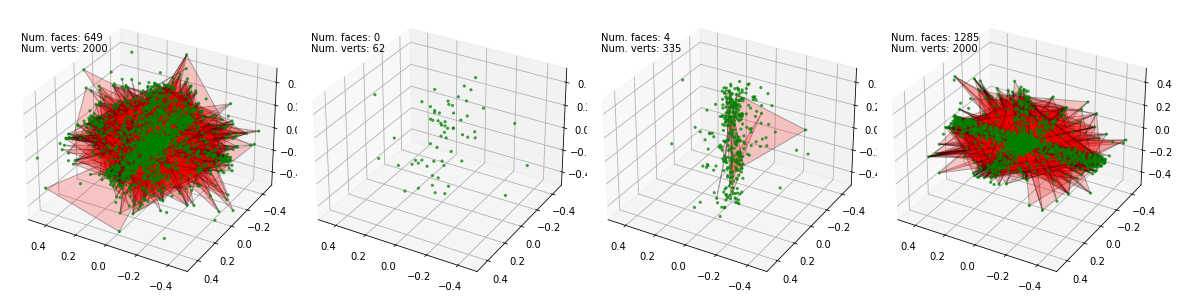

Step 75
Loss (vertices) 25751.001953125
Loss (faces) 87097.609375


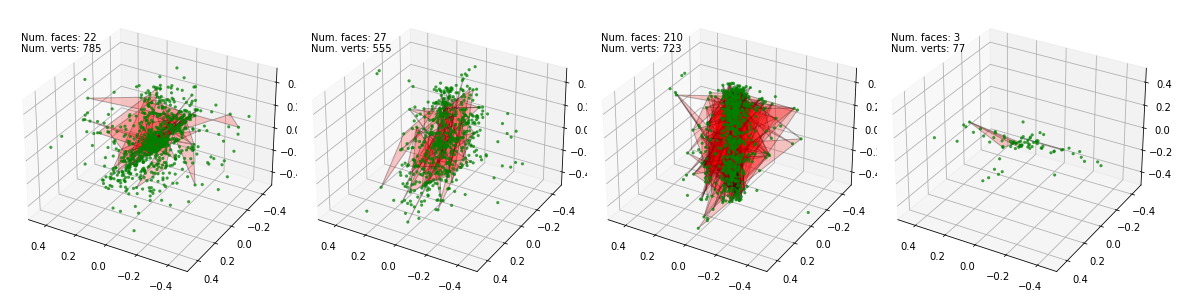

Step 80
Loss (vertices) 24344.533203125
Loss (faces) 83663.921875


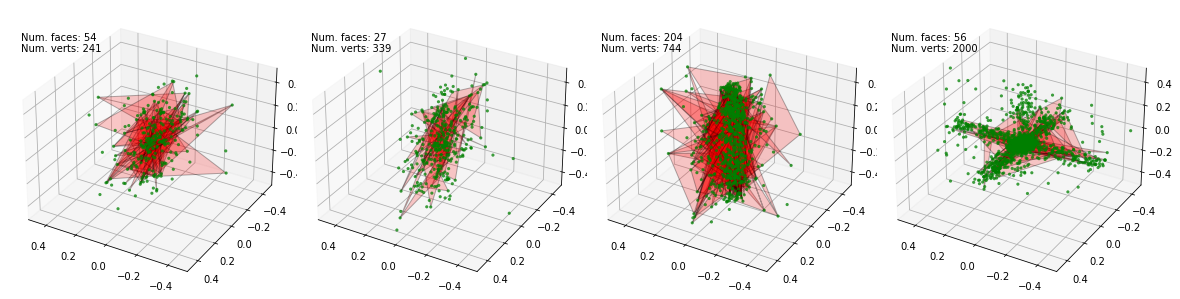

Step 85
Loss (vertices) 22850.2578125
Loss (faces) 79318.5


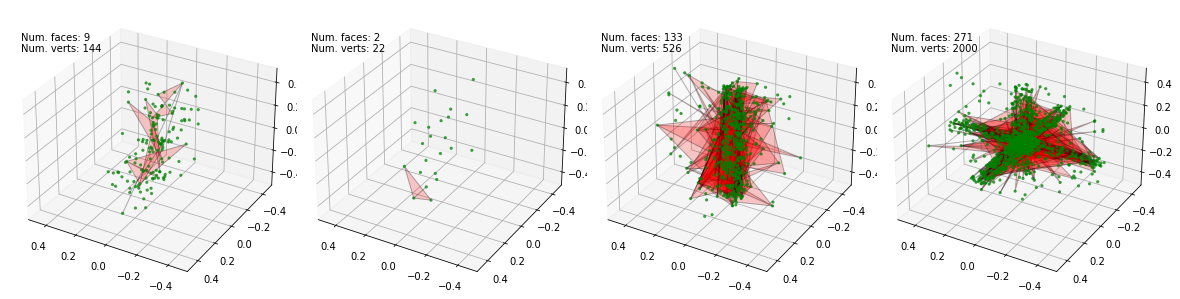

In [8]:
# Optimization settings
learning_rate = 5e-4
training_steps = 500
check_step = 5

# Create an optimizer an minimize the summed log probability of the mesh 
# sequences
optimizer = tf.train.AdamOptimizer(learning_rate)
vertex_model_optim_op = optimizer.minimize(vertex_model_loss)
face_model_optim_op = optimizer.minimize(face_model_loss)

# Training loop
config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.Session(config=config)
with sess:
  sess.run(tf.global_variables_initializer())
  for n in range(training_steps):
    if n % check_step == 0:
      v_loss, f_loss = sess.run((vertex_model_loss, face_model_loss))
      print('Step {}'.format(n))
      print('Loss (vertices) {}'.format(v_loss))
      print('Loss (faces) {}'.format(f_loss))
      v_samples_np, f_samples_np, b_np = sess.run(
        (vertex_samples, face_samples, vertex_model_batch))
      mesh_list = []
      for n in range(4):
        mesh_list.append(
            {
                'vertices': v_samples_np['vertices'][n][:v_samples_np['num_vertices'][n]],
                'faces': data_utils.unflatten_faces(
                    f_samples_np['faces'][n][:f_samples_np['num_face_indices'][n]])
            }
        )
      data_utils.plot_meshes(mesh_list, ax_lims=0.5)
    sess.run((vertex_model_optim_op, face_model_optim_op))